

**GRUPO <7>**

Pilar Arias, Álvaro García Cid, Yedra Martín, Amaya Sarasa


# Diseño, Entrenamiento y Test de un Sistema de Redes de Neuronas Artificiales.

Crearemos un modelo de Red de Neuronas Artificiales que sea capaz de reconocer y clasificar
imágenes de ropa en sus diferentes tipologías. 

Este modelo será definido, configurado,
entrenado, evaluado y mejorado para posteriormente usarlo para hacer predicciones.

Para ello creareos un modelo en Keras haciendo uso del conjunto de datos Fashion-MNIST.

Fashion-MNIST es un conjunto de datos de las imágenes de los artículos de Zalando
(www.zalando.com), una tienda de moda online alemana especializada en ventas de
ropa y zapatos. El conjunto de datos contiene 70K imágenes en escala de grises en 10
categorías. Estas imágenes muestran prendas individuales de ropa en baja resolución
(28 x 28 píxeles):
<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
  </td></tr>
</table>


# Conceptos básicos

**Optimizadores**: 

Un optimizador es una función o un algoritmo que modifica los atributos de la red neuronal, como los pesos y la tasa de aprendizaje. Por lo tanto, ayuda a reducir la pérdida general y mejorar la precisión. Vamos a trabajar con distintos optimizadores, para así estudiar el comportamiento y la diferencia entre ellos: 

   

*   *SGD*:(Descenso del gradiante estocástico)
    * El término estocástico significa aleatoriedad en la que se basa el algoritmo. En el descenso de gradiente estocástico, en lugar de tomar todo el conjunto de datos para cada iteración, seleccionamos aleatoriamente los lotes de datos. 
Eso significa que solo tomamos algunas muestras del conjunto de datos. Dado que no estamos utilizando todo el conjunto de datos, sino los lotes para cada iteración, la ruta tomada por el algoritmo está llena de ruido en comparación con el algoritmo de descenso de gradiente. Por lo tanto, SGD utiliza un mayor número de iteraciones para alcanzar los mínimos locales. Debido a un aumento en el número de iteraciones, el tiempo total de cálculo aumenta.

*   *RMSPROP*: 
    * Utiliza el signo del gradiente adaptando el tamaño del paso individualmente para cada peso. En este algoritmo, los dos gradientes se comparan primero en busca de signos. Si tienen el mismo signo, vamos en la dirección correcta y, por lo tanto, aumentamos el tamaño del paso en una pequeña fracción. Mientras que, si tienen signos opuestos, debemos disminuir el tamaño del paso. Luego limitamos el tamaño del paso, y ahora podemos optar por la actualización del peso.

*   *ADAM*: 
    * Hace uso de impulso y tasas de aprendizaje adaptativo para converger más rápido. Los resultados del optimizador de Adam son generalmente mejores que cualquier otro algoritmo de optimización, tienen un tiempo de cálculo más rápido y requieren menos parámetros para el ajuste.


<br />

**Función de activación**: 

Esta función define la salida de una capa según la entrada o las entradas que se va a recibir.

*   *RELU*: (unidad lineal rectificada) 
    * Es capaz de acelerar la velocidad de entrenamiento de las redes neuronales profundas en comparación con las funciones de activación tradicionales, ya que la derivada de ReLu es 1 para una entrada positiva. (Pone a cero los valores negativos). Por ello la usaremos como función de activación en la primera capa.

*   *SIGMOID*:
    * Toma un número como entrada y devuelve un nuevo valor entre 0 y 1. Se usa a menudo como una función de activación en las distintas capas de una red neuronal. Determina si un nodo debe activarse o no y, por lo tanto, si el nodo debe contribuir a los cálculos de la red o no.
*   *SOFTMAX*: 
    * Se utiliza en la capa de salida para predecir una distribución de problabilidad multinomial







# Importamos librerías y datos

Se importa Keras

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: []
2.9.2


Cargamos los datos que se van a estar utilizando. Se debe diferenciar entre los datos de entrenamiento y de prueba. Es importante saber que sólo se deben utilizar los datos de prueba para las pruebas, no podemos dejar que esos datos contaminen la red neuronal, esta solo debe aprender con los datos de entrenamiento.

In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Análisis de datos

Comprobamos las dimensiones de los datos proporcionados:

In [ ]:
print(train_images.shape)

(60000, 28, 28)


Siguiendo las instrucciones del ejercicio, usaremos 60.000 imágenes para el entrenamiento, de 28*28 píxeles. Más adelante deberemos cambiar las dimensiones de las imágenes, para así poderlas entrar correctamente a la primera capa de la red neuronal. 

Comprobamos la longitud de las etiquetas para comprobar que están todas, tanto en las fotos de entrenamiento como en las del test:

In [ ]:
len(train_labels)


60000

In [ ]:
len(test_labels)

10000

Es correcto, ya que para cada imagen, se tiene asociado una etiqueta como se deseaba.

A continuación, probamos a ver cómo se vería representada la imagen número 1001:

In [ ]:
import numpy as np
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[1000]))

[[  0   0   0   0   0   0   0   0   0   0   0  97  84  97 110 108  87  97   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  19 255 199 183 142 161 200 213  32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  72 174 173 158 131 132 176 176  70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 142 180 163 120 180 126 139 168 122   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 156 180 162 171 170 183 163 169 144   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 159 177 163 174 166 173 170 163 148   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 160 182 160 168 175 167 157 168 139   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 143 185 161 171 184 176 160 175 131   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 143 188 155 172 182 180 161 182 127   

Se puede asemejar a un pantalón, y efectivamente, comprobando con la etiqueta que se proporciona, se está representando de manera correcta.

In [ ]:
train_labels[1000]


1

Probamos otra manera de representar la imagen. 

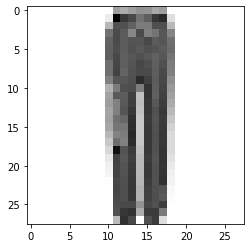

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[1000]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Analizamos cómo están distribuidos los datos.

A la hora de dividirlos en aquellos que usaremos para entrenar la red neuronal, idealmente querríamos una buena distribución de las imágenes de forma que haya un porcentaje similar de cada tipo de prenda, para ambos lotes. 

Si no estuviesen distribuidas de forma aceptable, no podríamos separar los datos de forma aleatoria.

In [ ]:
cont=0
cont1=0
cont2=0
cont3=0
cont4=0
cont5=0
cont6=0
cont7=0
cont8=0
cont9=0
for i in train_labels:
  if i==0:
    cont=cont+1
  elif i==1:
    cont1=cont1+1
  elif i==2:
    cont2=cont2+1
  elif i==3:
    cont3=cont3+1
  elif i==4:
    cont4=cont4+1
  elif i==5:
    cont5=cont5+1
  elif i==6:
    cont6=cont6+1
  elif i==7:
    cont7=cont7+1
  elif i==8:
    cont8=cont8+1
  elif i==9:
    cont9=cont9+1
print(cont,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9)

6000 6000 6000 6000 6000 6000 6000 6000 6000 6000


Tenemos 6.000 imágenes de cada tipo de ropa, en los datos de entrenamiento, un 10% de cada etiqueta, por lo que podemos decir que están bien distribuidos y podemos proceder a crear cada una de las redes neuronales que se necesitarán.

# Preparación de datos


Normalizamos las imágenes, y las representamos, para verificar que se ha realizado correctamente. 
Lo primero que se debe hacer es cambiar la dimensión de las imágenes para que pasen de ser una matriz a un vector. Una vez se ha cambiado la dimensión de las imágenes se necesita normalizar cada uno de los elementos de los vectores que representan los datos de cada imagen de entrenamiento.

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
print(len(train_images))
print(train_images.shape)
np.set_printoptions(precision=2, suppress=True, linewidth=145)
print(np.matrix(train_images[1000]))

60000
(60000, 784)
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.38 0.33 0.38 0.43 0.42 0.34 0.38 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.07 1.   0.78 0.72 0.56 0.63 0.78 0.84 0.13 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.28 0.68 0.68 0.62 0.51 0.52 0.69 0.69 0.27 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.56 0.71 0.64 0.47 0.71 0.49 0.55 0.66 0.48 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.61 0.71 0.64 0.67 0.67 0.72 0.64 0.66 0.56 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.62 0.69 0.64 0.68 0.65 0.68 0.67 0.64 0.58 0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.63 0.71 0.63 0.66 0.69 0.65 0.62 0.66 0.55 0.   0.   0.   0.   0.   0.   0.   0.   0.
 

Gracias al término one hot enconding, cambiamos el formato de las etiquetas. Lo que encontramos ahora es un vector de 10 bits, con todos los valores en 0, excepto un bit cuyo valor sea 1 cuya posición nos indicará a qué clase de ropa pertenece la imagen. 


In [ ]:
def to_one_hot(labels, dimension=10):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Datos de entrenamiento vectorizados
one_hot_train_labels = to_one_hot(train_labels)
# Datos de test vectorizados
one_hot_test_labels = to_one_hot(test_labels)
print(one_hot_test_labels)


[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)
print(one_hot_test_labels[1])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# Casos

## Caso 1

Procedemos a crear el primer modelo.
Lo primero que determinamos es que se va a tratar de un modelo secuencial, es decir, irá pasando de capa en capa sin volver hacia atrás.
Tras esto, añadimos las capas que se nos han pedido, estas capas serán densas ya que conectarán cada neurona de una capa con todas las neuronas de la capa posterior.
La primera capa será una capa de 10 neuronas cuya función de activación será 'Relu'.
En la última capa debido a que se debe a una red neuronal de clasificación multiclase debemos crear una capa con 10 neuronas, debido a que este es el número de clases que tenemos y además debemos utilizar la función de activación softmax que nos devolverá valores de probabilidad de que esa imagen introducida pertenezca a cada una de las clases posibles.

In [ ]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))
network.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                7850      
                                                                 
 dense_29 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Procedemos a observar un diagrama que represente las capas con las que se está trabajando. En este caso, en la primera capa le entra un vector de tamaño 784 

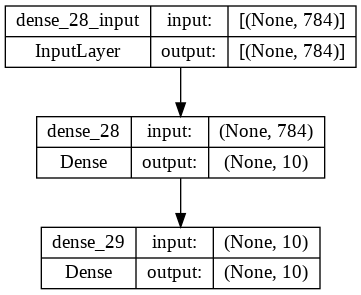

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
keras.utils.plot_model(network, "my_first_model.png", show_shapes=True)

A continuación, marcamos el optimizador que utilizaremos, en este caso basado en el descenso estocástico del gradiente, la función de pérdida que será categórica debido a que estamos clasificando en categorías y la métrica a utilizar que será la precisión.

In [ ]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Procedemos a entrenar la red con los datos de entrenamiento y a su vez queremos ver la pérdida de validación, en la cual usamos los datos de entrenamiento y la precisión de esos datos de validación.
En este caso el número de épocas será 5 y el batch_size utilizado 128, es decir actualizará los pesos de la red neuronal cada vez que pase un lote de 128 imágenes de entrenamiento por la red neuronal

In [ ]:
# Dividimos los datos de entrenamiento entre detos de validación y datos de entrenamiento y de igual forma con las etiquetas
x_val = train_images[:10000]
partial_x_train = train_images[10000:]
y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [ ]:
history = network.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 2s 3ms/step - loss: 1.4200 - accuracy: 0.5448 - val_loss: 0.9956 - val_accuracy: 0.6585
Epoch 2/5
391/391 [==============================] - 2s 4ms/step - loss: 0.8805 - accuracy: 0.6852 - val_loss: 0.8091 - val_accuracy: 0.7106
Epoch 3/5
391/391 [==============================] - 2s 4ms/step - loss: 0.7610 - accuracy: 0.7239 - val_loss: 0.7298 - val_accuracy: 0.7387
Epoch 4/5
391/391 [==============================] - 3s 6ms/step - loss: 0.6975 - accuracy: 0.7483 - val_loss: 0.6778 - val_accuracy: 0.7572
Epoch 5/5
391/391 [==============================] - 3s 7ms/step - loss: 0.6524 - accuracy: 0.7674 - val_loss: 0.6402 - val_accuracy: 0.7710


Por último, realizamos una gráfica en la que enfrentamos el número de épocas con los datos de pérdida tanto de validación, como de entrenamiento, con el fin de saber el número adecuado de épocas para no sobre entrenar el modelo.

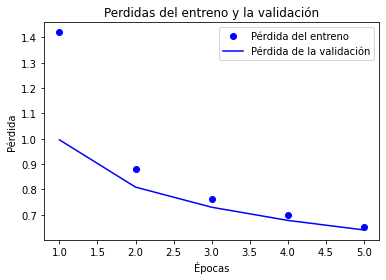

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Para el resto de modelos realizaremos el mismo procedimiento seguido en este caso para la creación de la red neuronal.

## Caso 2

In [ ]:
network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network2.add(layers.Dense(10, activation='softmax'))
network2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 10)                7850      
                                                                 
 dense_31 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


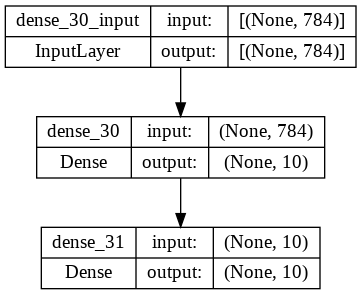

In [ ]:
keras.utils.plot_model(network2, "my_first_model.png", show_shapes=True)

In [ ]:
network2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history = network2.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 3s 5ms/step - loss: 0.9349 - accuracy: 0.6796 - val_loss: 0.5918 - val_accuracy: 0.8034
Epoch 2/5
391/391 [==============================] - 2s 4ms/step - loss: 0.5386 - accuracy: 0.8165 - val_loss: 0.5023 - val_accuracy: 0.8329
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 0.4844 - accuracy: 0.8338 - val_loss: 0.4867 - val_accuracy: 0.8297
Epoch 4/5
391/391 [==============================] - 2s 4ms/step - loss: 0.4565 - accuracy: 0.8431 - val_loss: 0.5139 - val_accuracy: 0.8173
Epoch 5/5
391/391 [==============================] - 2s 4ms/step - loss: 0.4410 - accuracy: 0.8476 - val_loss: 0.4518 - val_accuracy: 0.8452


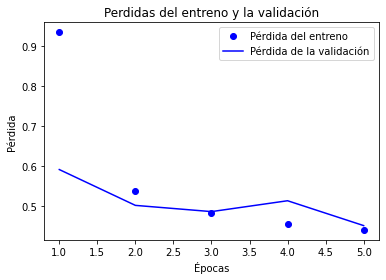

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Caso 2.2

In [ ]:
network22 = models.Sequential()
network22.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network22.add(layers.Dense(10, activation='softmax'))
network22.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 10)                7850      
                                                                 
 dense_33 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


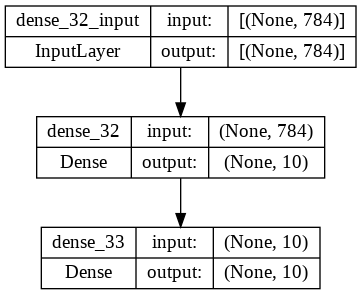

In [ ]:
keras.utils.plot_model(network22, "my_first_model.png", show_shapes=True)

In [ ]:
network22.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

En este modelo vamos a implementar una diferencia respecto a los modelos anteriores que se basará en el número de épocas, en este caso, será 25 y nos servirá para hacer una comparativa con el caso del modelo 2.

In [ ]:
history = network22.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/25
391/391 [==============================] - 2s 4ms/step - loss: 0.8249 - accuracy: 0.7274 - val_loss: 0.5904 - val_accuracy: 0.7996
Epoch 2/25
391/391 [==============================] - 2s 4ms/step - loss: 0.5218 - accuracy: 0.8209 - val_loss: 0.5013 - val_accuracy: 0.8246
Epoch 3/25
391/391 [==============================] - 1s 3ms/step - loss: 0.4795 - accuracy: 0.8339 - val_loss: 0.4762 - val_accuracy: 0.8358
Epoch 4/25
391/391 [==============================] - 2s 4ms/step - loss: 0.4603 - accuracy: 0.8398 - val_loss: 0.4548 - val_accuracy: 0.8409
Epoch 5/25
391/391 [==============================] - 1s 3ms/step - loss: 0.4455 - accuracy: 0.8450 - val_loss: 0.4910 - val_accuracy: 0.8226
Epoch 6/25
391/391 [==============================] - 1s 4ms/step - loss: 0.4368 - accuracy: 0.8477 - val_loss: 0.4548 - val_accuracy: 0.8455
Epoch 7/25
391/391 [==============================] - 2s 4ms/step - loss: 0.4298 - accuracy: 0.8498 - val_loss: 0.4405 - val_accuracy: 0.8460
Epoch 

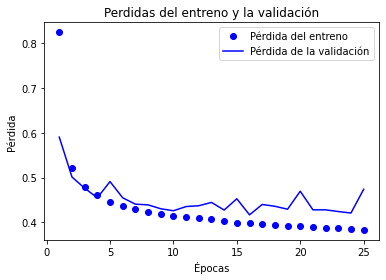

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

###Comparación modelos 2 y 2.2
En este caso podemos realizar una comparación entre los modelos 2 y 2.2 donde se puede observar claramente un ejemplo de sobre entrenamiento en el caso 2.2, donde se ve que a partir de la época 10 la pérdida de validación se dispara respecto a la pérdida de entrenamiento, por tanto, el modelo 2.2 es peor que el modelo 2 debido a que la red se ha sobre entrenado.


## Caso 3

In [ ]:
network3 = models.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network3.add(layers.Dense(10, activation='softmax'))
network3.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 10)                7850      
                                                                 
 dense_35 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


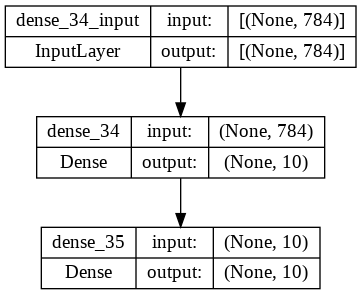

In [ ]:
keras.utils.plot_model(network3, "my_first_model.png", show_shapes=True)

In [ ]:
network3.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history = network3.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 3s 4ms/step - loss: 2.1868 - accuracy: 0.2909 - val_loss: 2.0391 - val_accuracy: 0.4145
Epoch 2/5
391/391 [==============================] - 2s 4ms/step - loss: 1.9232 - accuracy: 0.4885 - val_loss: 1.8092 - val_accuracy: 0.5812
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 1.7176 - accuracy: 0.6174 - val_loss: 1.6261 - val_accuracy: 0.6369
Epoch 4/5
391/391 [==============================] - 1s 4ms/step - loss: 1.5544 - accuracy: 0.6499 - val_loss: 1.4813 - val_accuracy: 0.6531
Epoch 5/5
391/391 [==============================] - 1s 3ms/step - loss: 1.4241 - accuracy: 0.6690 - val_loss: 1.3649 - val_accuracy: 0.6716


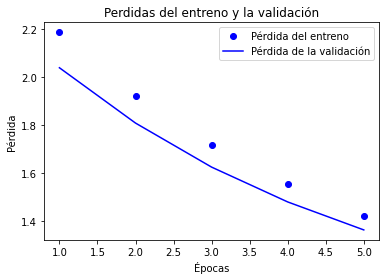

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

##Caso 3.2 

**Keras flatten** aplana la entrada sin afectar el tamaño del lote. Se utiliza cuando se trata de cualquiera de los tensores multidimensionales que consisten en conjuntos de datos de imágenes y conjuntos de datos de múltiples capas que no permiten perder ninguna información de los mismos.

El método layer.flatten() se utiliza para convertir una matriz multidimensional en una matriz plana unidimensional o, por ejemplo, una matriz unidimensional.

Ninguna de las dimensiones del lote se incluye como parte de keras.layer.flatten, donde la noción simple es la alimentación de la entrada como multidimensional y la salida esperada como una matriz unidimensional.

Observamos como implementarla en el caso 3: 

Este modelo es un poco diferente al resto de modelos, en primer lugar porque se va a utilizar la función keras.layes.flatten que permite introducir las imágenes en la red neuronal sin necesidad de cambiar las dimensiones de las imágenes ya que será es primera capa la que se encargará de cambiar la dimensión de los datos de entrada para adecuarlos al modelo.

Además, otra diferencia es que no debemos normalizar ni las imágenes ni las etiquetas, ya que utilizaremos una función de pérdida que es sparse_categorigal_crosentropy que trabaja con los datos iniciales y no con los datos normalizados. Esto también se debe al uso de un nuevo optimizador que es 'Adam'.

In [ ]:
network32= keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
]) 
network32.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 10)                7850      
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


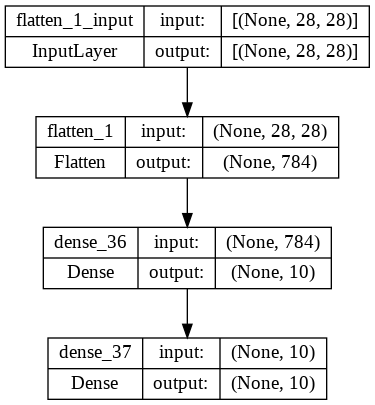

In [ ]:
keras.utils.plot_model(network32, "my_first_model.png", show_shapes=True)

In [ ]:
network32.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

Volvemos a importar los datos ya que los queremos en su forma inicial

In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [ ]:
history = network32.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 2s 5ms/step - loss: 2.9346 - accuracy: 0.1272 - val_loss: 2.1969 - val_accuracy: 0.1463
Epoch 2/5
391/391 [==============================] - 2s 4ms/step - loss: 2.1600 - accuracy: 0.1620 - val_loss: 2.1461 - val_accuracy: 0.1809
Epoch 3/5
391/391 [==============================] - 2s 4ms/step - loss: 2.0653 - accuracy: 0.1914 - val_loss: 2.0149 - val_accuracy: 0.1899
Epoch 4/5
391/391 [==============================] - 2s 4ms/step - loss: 1.9888 - accuracy: 0.2072 - val_loss: 1.9577 - val_accuracy: 0.2063
Epoch 5/5
391/391 [==============================] - 1s 4ms/step - loss: 1.9235 - accuracy: 0.2254 - val_loss: 1.8210 - val_accuracy: 0.2532


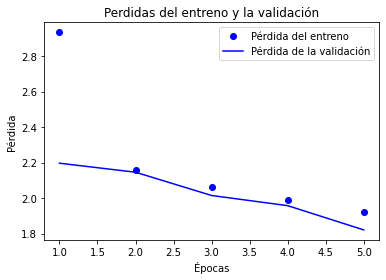

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Tras haber realizado los modelos 3 y 3.2 podemos concluir que el optimizador Adam en este tipo de redes neuronales de clasificación multiclase no mejora a los optimizadores como sgd y rmsprop ya que este trabaja con datos sin normalizar lo que hace más difícil el entreno con tan pocas épocas ya que se pasa de valores de entrada que pueden estar entre 0 y 255 a tener que dar valores de salida entre 0 y 1.

Viendo las gráficas de error vemos que el error en el caso 3.2 el error desciende muy poco a poco, casi siendo lineal, mientras que en el caso 3, el error desciende de forma más abrupta. 




## Caso 4

Volvemos a importar los datos y a normalizarlos y convertirlos en vectores ya que vamos a volver a utilizar la función de pérdida categorical_crossentropy

In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [ ]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
network4 = models.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network4.add(layers.Dense(10, activation='softmax'))
network4.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 10)                7850      
                                                                 
 dense_39 (Dense)            (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


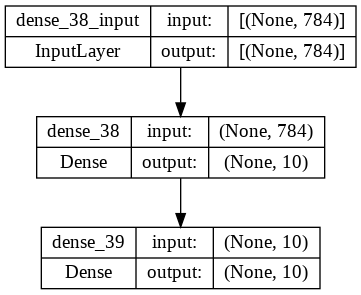

In [ ]:
keras.utils.plot_model(network4, "my_first_model.png", show_shapes=True)

In [ ]:
network4.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
x_val = train_images[:10000]
partial_x_train = train_images[10000:]

y_val = one_hot_train_labels[:10000]
partial_y_train = one_hot_train_labels[10000:]

In [ ]:
history = network4.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 2s 5ms/step - loss: 1.4405 - accuracy: 0.6282 - val_loss: 1.0835 - val_accuracy: 0.7003
Epoch 2/5
391/391 [==============================] - 1s 3ms/step - loss: 0.9002 - accuracy: 0.7468 - val_loss: 0.7692 - val_accuracy: 0.7782
Epoch 3/5
391/391 [==============================] - 1s 3ms/step - loss: 0.6840 - accuracy: 0.7985 - val_loss: 0.6380 - val_accuracy: 0.8049
Epoch 4/5
391/391 [==============================] - 2s 4ms/step - loss: 0.5801 - accuracy: 0.8208 - val_loss: 0.5566 - val_accuracy: 0.8245
Epoch 5/5
391/391 [==============================] - 1s 4ms/step - loss: 0.5240 - accuracy: 0.8314 - val_loss: 0.5178 - val_accuracy: 0.8325


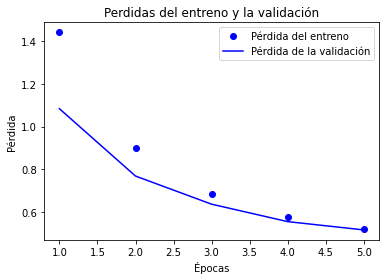

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Caso 5

Los modelos creados a continuación se diferencian de los modelos creados anteriormente en la primera capa, ya que en este caso será una primera capa que estará formada por 512 neuronas.

In [ ]:
network5 = models.Sequential()
network5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network5.add(layers.Dense(10, activation='softmax'))
network5.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 512)               401920    
                                                                 
 dense_41 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


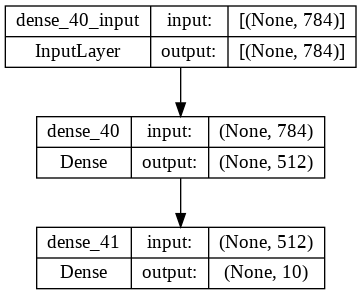

In [ ]:
keras.utils.plot_model(network5, "my_first_model.png", show_shapes=True)

In [ ]:
network5.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history = network5.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 5s 11ms/step - loss: 1.0490 - accuracy: 0.6933 - val_loss: 0.7521 - val_accuracy: 0.7633
Epoch 2/5
391/391 [==============================] - 4s 9ms/step - loss: 0.6808 - accuracy: 0.7841 - val_loss: 0.6348 - val_accuracy: 0.7977
Epoch 3/5
391/391 [==============================] - 4s 10ms/step - loss: 0.6004 - accuracy: 0.8068 - val_loss: 0.5775 - val_accuracy: 0.8153
Epoch 4/5
391/391 [==============================] - 4s 10ms/step - loss: 0.5567 - accuracy: 0.8189 - val_loss: 0.5480 - val_accuracy: 0.8192
Epoch 5/5
391/391 [==============================] - 4s 10ms/step - loss: 0.5280 - accuracy: 0.8266 - val_loss: 0.5220 - val_accuracy: 0.8275


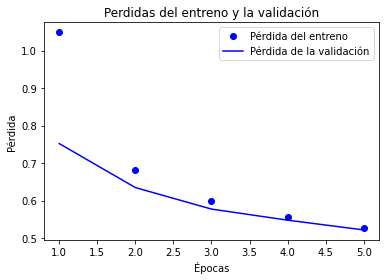

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Caso 6

In [ ]:
network6 = models.Sequential()
network6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network6.add(layers.Dense(10, activation='softmax'))
network6.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 512)               401920    
                                                                 
 dense_43 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


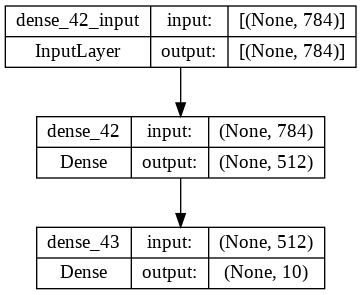

In [ ]:
keras.utils.plot_model(network6, "my_first_model.png", show_shapes=True)

In [ ]:
network6.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history = network6.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 6s 14ms/step - loss: 0.5868 - accuracy: 0.7936 - val_loss: 0.4321 - val_accuracy: 0.8411
Epoch 2/5
391/391 [==============================] - 5s 12ms/step - loss: 0.3959 - accuracy: 0.8545 - val_loss: 0.3757 - val_accuracy: 0.8654
Epoch 3/5
391/391 [==============================] - 4s 11ms/step - loss: 0.3487 - accuracy: 0.8720 - val_loss: 0.3310 - val_accuracy: 0.8785
Epoch 4/5
391/391 [==============================] - 5s 14ms/step - loss: 0.3211 - accuracy: 0.8820 - val_loss: 0.3355 - val_accuracy: 0.8752
Epoch 5/5
391/391 [==============================] - 5s 13ms/step - loss: 0.2998 - accuracy: 0.8894 - val_loss: 0.3325 - val_accuracy: 0.8809


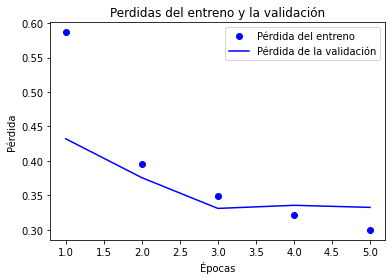

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

## Caso 7

In [ ]:
network7 = models.Sequential()
network7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network7.add(layers.Dense(10, activation='softmax'))
network7.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 512)               401920    
                                                                 
 dense_45 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


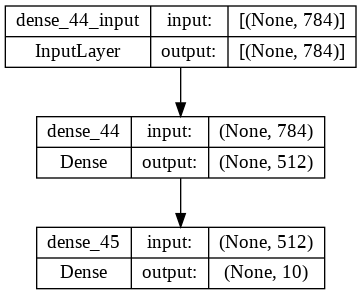

In [ ]:
keras.utils.plot_model(network7, "my_first_model.png", show_shapes=True)

In [ ]:
network7.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history = network7.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 5s 12ms/step - loss: 1.7754 - accuracy: 0.5783 - val_loss: 1.3949 - val_accuracy: 0.6880
Epoch 2/5
391/391 [==============================] - 4s 10ms/step - loss: 1.2144 - accuracy: 0.7034 - val_loss: 1.0701 - val_accuracy: 0.7201
Epoch 3/5
391/391 [==============================] - 4s 10ms/step - loss: 0.9904 - accuracy: 0.7260 - val_loss: 0.9192 - val_accuracy: 0.7340
Epoch 4/5
391/391 [==============================] - 4s 10ms/step - loss: 0.8746 - accuracy: 0.7390 - val_loss: 0.8319 - val_accuracy: 0.7451
Epoch 5/5
391/391 [==============================] - 4s 10ms/step - loss: 0.8040 - accuracy: 0.7486 - val_loss: 0.7769 - val_accuracy: 0.7535


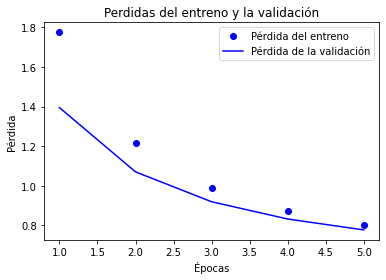

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

##Caso 7.2

En este caso al igual que en el 2.2 aumentaremos el número de épocas a la hora de entrenar la red para hacer una comparativa con el modelo original.

In [ ]:
network72 = models.Sequential()
network72.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network72.add(layers.Dense(10, activation='softmax'))
network72.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 512)               401920    
                                                                 
 dense_47 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


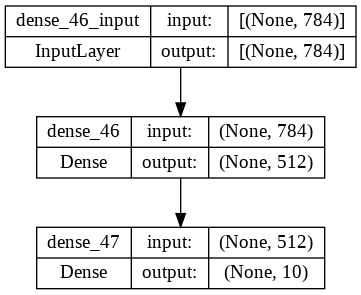

In [ ]:
keras.utils.plot_model(network72, "my_first_model.png", show_shapes=True)

In [ ]:
network72.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history = network72.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/25
391/391 [==============================] - 5s 11ms/step - loss: 1.7612 - accuracy: 0.5819 - val_loss: 1.3901 - val_accuracy: 0.6901
Epoch 2/25
391/391 [==============================] - 4s 11ms/step - loss: 1.2091 - accuracy: 0.7051 - val_loss: 1.0691 - val_accuracy: 0.7111
Epoch 3/25
391/391 [==============================] - 4s 9ms/step - loss: 0.9875 - accuracy: 0.7270 - val_loss: 0.9163 - val_accuracy: 0.7359
Epoch 4/25
391/391 [==============================] - 4s 11ms/step - loss: 0.8728 - accuracy: 0.7395 - val_loss: 0.8314 - val_accuracy: 0.7442
Epoch 5/25
391/391 [==============================] - 4s 10ms/step - loss: 0.8031 - accuracy: 0.7477 - val_loss: 0.7748 - val_accuracy: 0.7528
Epoch 6/25
391/391 [==============================] - 4s 10ms/step - loss: 0.7556 - accuracy: 0.7542 - val_loss: 0.7368 - val_accuracy: 0.7587
Epoch 7/25
391/391 [==============================] - 4s 10ms/step - loss: 0.7211 - accuracy: 0.7606 - val_loss: 0.7069 - val_accuracy: 0.7646


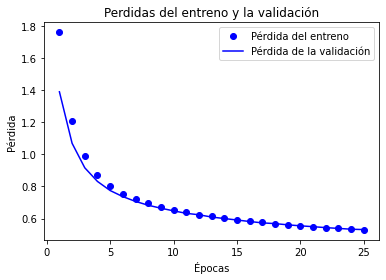

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

###Comparación modelos 7 y 7.2
Estos dos modelos tienen una única diferencia y es el número de épocas que se han utilizado para entrenar el modelo, en este caso, a diferencia de la comparación de los modelos 2 y 2.2, podemos decir que entrenando el mismo modelo pero 5 veces más no se produce sobre entrenamiento sino que el modelo en la época 25 sigue mejorando al igual que la precisión.
Por tanto podemos decir, que en el caso del modelo 7 es mejor entrenar el modelo con 25 épocas para mejorar la precisión del modelo.

## Caso 8

In [ ]:
network8 = models.Sequential()
network8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network8.add(layers.Dense(10, activation='softmax'))
network8.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 512)               401920    
                                                                 
 dense_49 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


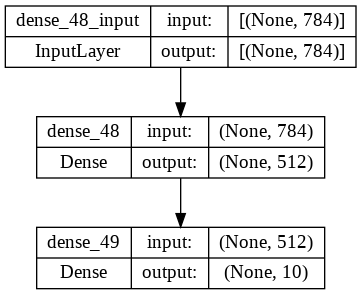

In [ ]:
keras.utils.plot_model(network8, "my_first_model.png", show_shapes=True)

In [ ]:
network8.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
history = network8.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/5
391/391 [==============================] - 6s 15ms/step - loss: 0.6144 - accuracy: 0.7844 - val_loss: 0.4693 - val_accuracy: 0.8279
Epoch 2/5
391/391 [==============================] - 5s 13ms/step - loss: 0.4405 - accuracy: 0.8389 - val_loss: 0.4031 - val_accuracy: 0.8575
Epoch 3/5
391/391 [==============================] - 5s 12ms/step - loss: 0.3974 - accuracy: 0.8552 - val_loss: 0.3933 - val_accuracy: 0.8589
Epoch 4/5
391/391 [==============================] - 6s 14ms/step - loss: 0.3714 - accuracy: 0.8641 - val_loss: 0.3692 - val_accuracy: 0.8689
Epoch 5/5
391/391 [==============================] - 6s 15ms/step - loss: 0.3505 - accuracy: 0.8726 - val_loss: 0.3553 - val_accuracy: 0.8724


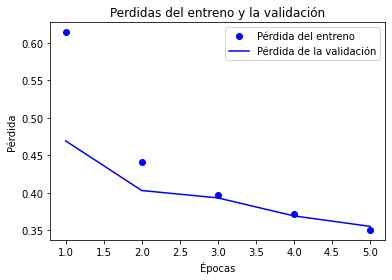

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

##Resultados obtenidos con la función model.summary

Tras haber realizado los 8 modelos de red neuronal, vemos que todos los modelos al emplear la función .summary, están representados por dos capas:
En el caso de los 4 primeros casos en la capa 1 vemos que estas tienen 10 neuronas y por tanto en estos casos el número de parámetros que se pueden modificar en esta capa son 7850, que corresponden a multiplicar la dimensión del vector de entrada 784 por el número de nueronas de la capa que es 10 más los 10 umbrales de cada neurona.

En cuanto a los casos 5 a 8 en la capa 1 vemos que estas tienen 512 neuronas y por tanto en estos casos el número de parámetros que se pueden modificar en esta capa son 401920, que corresponden a multiplicar la dimensión del vector de entrada 784 por el número de nueronas de la capa que es 512 más los 512 umbrales de cada neurona.

En cuanto a la segunda capa que esta representada ocurre lo mismo que en la primera capa los modelos 1 a 4 en la capa 2 vemos que estas tienen 10 neuronas y por tanto en estos casos el número de parámetros que se pueden modificar en esta capa son 110, que corresponden a multiplicar el número de neuronas de la capa anterior por el número de nueronas de la capa que es 10 más los 10 umbrales de cada neurona.

En cuanto a los modelos 5 a 8 en la capa 2 vemos que estas tienen 10 neuronas y por tanto en estos casos el número de parámetros que se pueden modificar en esta capa son 5130, que corresponden a multiplicar el número de neuronas de la capa anterior 512 por el número de nueronas de la capa que es 10 más los 10 umbrales de cada neurona.
Por tanto el número de parámetros a modificar en los casos 1 a 4 es 7960 y en los caso 5 a 8 es 407050

##Comparación predicción resultados imagen test 6

Tras haber realizado todos los modelos que se necesitan, vamos a proceder a estudiar las predicciones que realizan cada uno de nuestros 8 modelos, con el fin de saber como de buenos son cada uno de nuestros modelos.

In [ ]:
predictions = network.predict(test_images)
predictions2 = network2.predict(test_images)
predictions3 = network3.predict(test_images)
predictions4 = network4.predict(test_images)
predictions5 = network5.predict(test_images)
predictions6 = network6.predict(test_images)
predictions7 = network7.predict(test_images)
predictions8 = network8.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)    

  predicted_label = np.argmax(predictions_array)
  if predicted_label.all() == true_label.all():
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Vamos a tomar la imagen de test 6 con el fin de ver como predice cada uno de nuestros modelos la imagen, para ello crearemos un gráfico de barras en el cuál se represente el vector de datos de salida que se obtiene tras introducir la imagen en cada una de las redes.

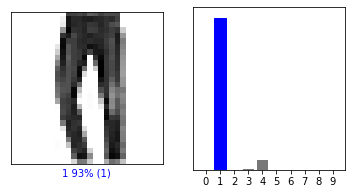

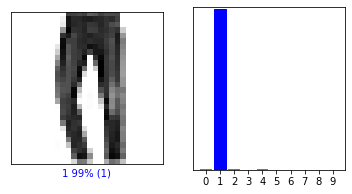

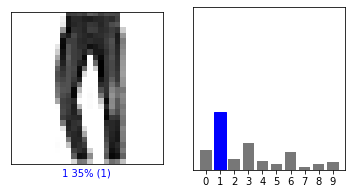

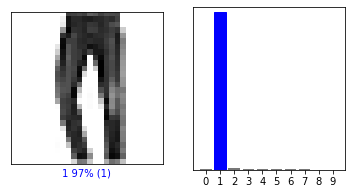

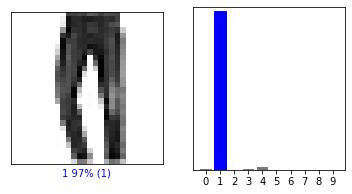

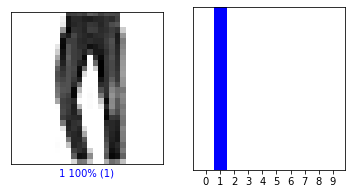

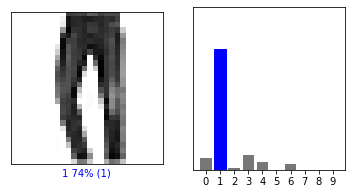

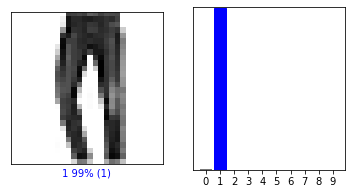

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions2[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions2[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions3[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions3[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions4[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions4[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions5[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions5[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions6[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions6[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions7[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions7[5], test_labels)
plt.show()
##
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(5, predictions8[5], test_labels, test_images.reshape(10000,28,28))
plt.subplot(1,2,2)
plot_value_array(5, predictions8[5], test_labels)
plt.show()

Viendo las predicciones realizadas por todos los modelos para la imagen número 6, vemos que todos los modelos predicen que esa imagen es un 1, etiqueta que simboliza los pantalones.
A pesar de que todos los modelos predicen correctamente la etiqueta, no todos los modelos la predicen de la misma manera, los modelos 1,2,4,5,6,8 tienen un valor en la posición 1 del vector de salida un número superior al 0.95 lo que da un porcentaje muy fiable de que esa imagen sea un pantalón.
En cambio, los modelos 3 y 7 tiene un número relativamente bajo de que esa imagen sea un pantalon, ambas inferiores al 0.9.
Por tanto, para esta imagen podemos asegurar que los modelos 3 y 7 no son muy buenos, es más el modelo 3 se destaca por ser muy malo.

#Conclusiones finales

Para poder realizar un ánalisis mejor de cada uno de los modelos y conocer para que clases los modelos son mejores y para que imagenes fallan más, vamos a realizar la matriz de confusión de cada uno de los 8 modelos.

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 1============================


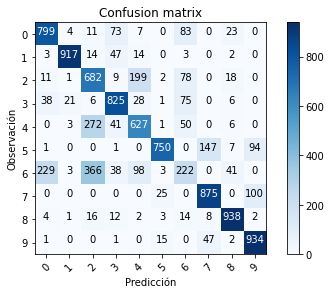

In [ ]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
# Convertir en predicciones de clases desde los vectores one-hot encoding 
Y_pred_classes = np.argmax(predictions, axis = 1) 
# Convertir en clases de observación desde los vectores one-hot encoding
Y_true = np.argmax(one_hot_test_labels, axis = 1) 
# Computar la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Dibujar la matriz de confusión
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 1============================")
plot_confusion_matrix(confusion_mtx, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 2============================


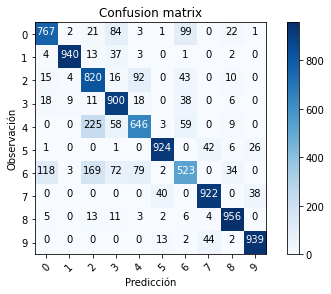

In [ ]:
Y_pred_classes2 = np.argmax(predictions2, axis = 1) 
Y_true2 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx2 = confusion_matrix(Y_true2, Y_pred_classes2) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 2============================")
plot_confusion_matrix(confusion_mtx2, classes = range(10)) 

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 3============================


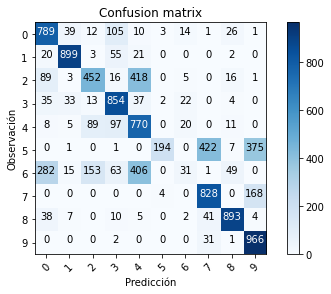

In [ ]:
Y_pred_classes3 = np.argmax(predictions3, axis = 1) 
Y_true3 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx3 = confusion_matrix(Y_true3, Y_pred_classes3) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 3============================")
plot_confusion_matrix(confusion_mtx3, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 4============================


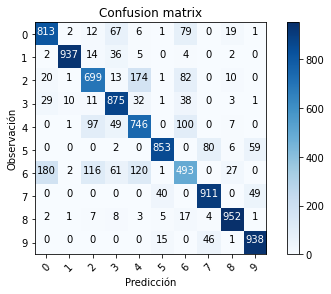

In [ ]:
Y_pred_classes4 = np.argmax(predictions4, axis = 1) 
Y_true4 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx4 = confusion_matrix(Y_true4, Y_pred_classes4) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 4============================")
plot_confusion_matrix(confusion_mtx4, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 5============================


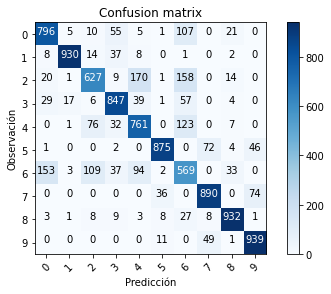

In [ ]:
Y_pred_classes5 = np.argmax(predictions5, axis = 1) 
Y_true5 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx5 = confusion_matrix(Y_true5, Y_pred_classes5) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 5============================")
plot_confusion_matrix(confusion_mtx5, classes = range(10)) 

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 6============================


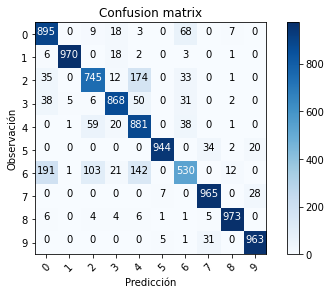

In [ ]:
Y_pred_classes6 = np.argmax(predictions6, axis = 1) 
Y_true6 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx6 = confusion_matrix(Y_true6, Y_pred_classes6) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 6============================")
plot_confusion_matrix(confusion_mtx6, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 7============================


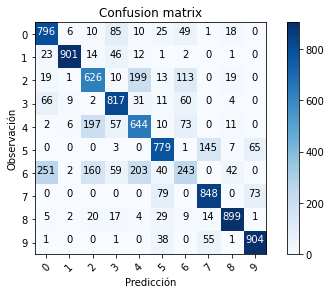

In [ ]:
Y_pred_classes7 = np.argmax(predictions7, axis = 1) 
Y_true7 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx7 = confusion_matrix(Y_true7, Y_pred_classes7) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 7============================")
plot_confusion_matrix(confusion_mtx7, classes = range(10))

=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 8============================


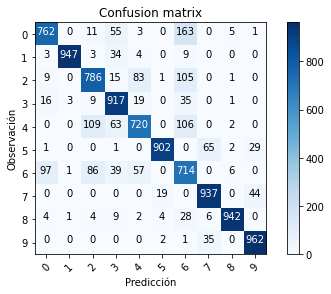

In [ ]:
Y_pred_classes8 = np.argmax(predictions8, axis = 1) 
Y_true8 = np.argmax(one_hot_test_labels, axis = 1) 
confusion_mtx8 = confusion_matrix(Y_true8, Y_pred_classes8) 
print("=PINTAMOS LA MATRIZ DE CONFUSION DEL CASO 8============================")
plot_confusion_matrix(confusion_mtx8, classes = range(10))

Tras haber realizado todos los modelos para los 8 casos, haberlos entrenado y haber realizado predicciones podemos sacar las siguientes conclusiones:

Los modelos han sido entrenados con 5 épocas que son pocas para saber si es el mejor número de épocas o si tras estas existe un número mejor o se produce sobre entrenamiento. 
Tras obtener los valores de error de los diferentes casos podemos ver que en los casos cuya primera capa esta formada por 512 neuronas tienen un valor de pérdida menor que en los casos que tienen los mismos hiperparámetros pero con 10 neuronas en esa primera capa.

Tras haber visto los gráficos de predicción de los modelos respecto a la imagen 6 de test, vemos que los modelos 3 y 7 son los que peor predicen el resultado y esto se verifica si comprobamos los valores obtenidos al entrenar en los valores de pérdida y en la precisión.

Estos modelos de los que hablamos, el modelo 3 y el 7 tienen en común tanto el optimizador 'sgd',como la función de activación 'sigmoid' de su primera capa. Por tanto podemos concluir que la combinación de estos dos hiperparámetros no es bueno a la hora de realizar redes neuronales de tipo clasificación multiclase.

En cambio, los modelos con una mejor precisión y menor pérdida se corresponde a los modelos 2 y 6 haciendo una separación entre modelos con una primera capa de 10 neuronas y una primera capa de 512 neuronas. Estos dos modelos corresponden a aquellos que tienen  el optimizador 'rmsprop',como la función de activación 'relu' de su primera capa. Por tanto podemos concluir que la combinación de estos dos hiperparámetros es bueno a la hora de realizar redes neuronales de tipo clasificación multiclase.

En cuanto al número de neuronas de la primera capa tienen mayor precisión y menor error aquellos que tienen 512 neuronas en esa primera capa.

En cuanto a las matrices de confusión, hemos observado que en todos los casos para las etiquetas imágenes de test pertenecientes a las etiquetas 2, 4 y 6 todos los modelos realizan predicciones malas en mayor medida que para el resto de casos. Para comprender mejor a que se debe esto, debemos recurrir a que tipo de ropa pertenecen estas etiquetas y descubrimos que es a jerseys, abrigos y camisas, lo que nos puede parecer normal ya que la forma de todos estos elementos en muchas ocasiones es parecida.

Además las conclusiones que sacamos de estas matrices de confusión, es que los modelos no son muy buenos en su conjunto, ya que se producen muchos errores en todos los casos a la hora de predecir.

# Resolución del trabajo en grupo# 
A la hora de afrontar la resolución de esta práctica hemos trabajado de forma muy metódica y constante. Tras recibir la práctica un miércoles, de forma individual nos aseguramos de leer y comprender en qué consistía dicha práctica y al día siguiente nos reunimos en persona todos los miembros para comenzar a abordarla.

Tras la primera reunión, donde vivimos lo que involucraba realizar un trabajo en equipo con github y google colab, fue aparente que era vital que existiese una constante y fluida comunicación entre todos nosotros a la hora de editar el proyecto cuando no estuviésemos todos juntos, para que todos trabajásemos sobre la misma versión, la más actualizada.

En cuanto a la división del trabajo en sí, ésta surgió de una forma muy orgánica puesto que cada individuo enfocaba su tiempo en solucionar distintos problemas según iban surgiendo resultando en un proyecto muy colaborativo y dinámico. Cada miembro aportó al proyecto sus destrezas y dotes particulares, solidificando que formamos un grupo muy completo.

En cuanto a como se ha procedido a realizar, comenzamos creando los distintos modelos de redes de forma muy básica y a partir de ahí, comenzamos a ir implementado diferentes variantes dentro de cada modelo.
Tras ello, hemos realizado una serie de gráficos para entender mejor el funcionamiento de cada uno de los modelos implementados y por últmo, hemos sacadao las conclusiones.